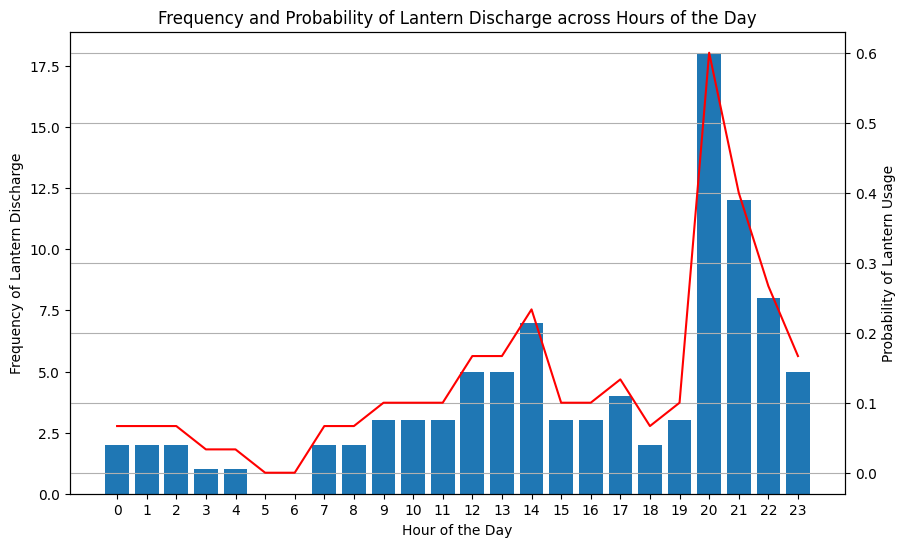

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def calculate_voltage_rate(input_directory, output_directory):
    for file_name in os.listdir(input_directory):
        if file_name.endswith(".xlsx") or file_name.endswith(".xls"):
            input_file = os.path.join(input_directory, file_name)
            output_file = os.path.join(output_directory, file_name)

            df = pd.read_excel(input_file, parse_dates=['datetime'])

            df['voltage_diff'] = df['LANTERN VOLTAGE (V)'].diff()
            df['time_diff'] = df['datetime'].diff().dt.total_seconds()
            df['Voltage Rate (V/s)'] = df['voltage_diff'] / df['time_diff']

            df.to_excel(output_file, index=False)
            
def apply_one_hot_encoding(input_directory, output_file):
    frequencies = {hour: [0] * 24 for hour in range(24)}
    total_lanterns = 0

    for file_name in os.listdir(input_directory):
        if file_name.endswith(".xlsx") or file_name.endswith(".xls"):
            input_file = os.path.join(input_directory, file_name)
            df = pd.read_excel(input_file, parse_dates=['datetime'])
            df['hour'] = df['datetime'].dt.hour
            

            condition = df['Voltage Rate (V/s)'] < -0.0001
            hours_checked = set()

            for index, row in df.iterrows():
                hour = row['hour']
                if hour not in hours_checked and condition[index]:
                    frequencies[hour][hour] += 1
                    hours_checked.add(hour)

            total_lanterns += 1

    probabilities_vol = {hour: sum(frequencies[hour]) / total_lanterns for hour in range(24)}

    df_result = pd.DataFrame(frequencies)
    df_result.index.name = 'Lantern K'
    df_result.to_excel(output_file)

    return df_result, probabilities_vol

def visualize_results(input_file, probabilities_vol):
    df = pd.read_excel(input_file, index_col='Lantern K')

    fig, ax1 = plt.subplots(figsize=(10, 6))

    for hour in df.columns:
        ax1.bar(int(hour), df[hour].sum(), color='#1f77b4')

    ax1.set_xlabel('Hour of the Day')
    ax1.set_ylabel('Frequency of Lantern Discharge')
    ax1.tick_params(axis='y')

    ax2 = ax1.twinx()
    ax2.plot(range(24), list(probabilities_vol.values()), color='red', linestyle='-')
    ax2.set_ylabel('Probability of Lantern Usage')
    ax2.tick_params(axis='y')

    plt.title('Frequency and Probability of Lantern Discharge across Hours of the Day')
    plt.xticks(range(24))
    plt.grid(True)
    plt.show()

# Input and output directories
input_directory = r'C:\Users\ahsani2\Documents\03- AI part\03 - Third Try\Dataset'
output_voltage_rate_directory = r'C:\Users\ahsani2\Documents\03- AI part\03 - Third Try\VoltageRate'
output_encoded_directory = r'C:\Users\ahsani2\Documents\03- AI part\03 - Third Try'
output_encoded_file = r'C:\Users\ahsani2\Documents\03- AI part\03 - Third Try\output_encoded_result.xlsx'

# Step 1: Calculate voltage rate for each file and save them separately
calculate_voltage_rate(input_directory, output_voltage_rate_directory)

# Step 2: Apply one-hot encoding to the voltage rate files and save the result
result_df, probabilities_vol = apply_one_hot_encoding(output_voltage_rate_directory, os.path.join(output_encoded_directory, output_encoded_file))

# Step 3: Visualize the results
visualize_results(os.path.join(output_encoded_directory, output_encoded_file), probabilities_vol)


Step 1: Calculated frequencies for each hour for all lanterns:
Hour 0: 7
Hour 1: 6
Hour 2: 9
Hour 3: 9
Hour 4: 5
Hour 5: 6
Hour 6: 4
Hour 7: 6
Hour 8: 9
Hour 9: 19
Hour 10: 19
Hour 11: 19
Hour 12: 18
Hour 13: 21
Hour 14: 14
Hour 15: 16
Hour 16: 17
Hour 17: 16
Hour 18: 17
Hour 19: 14
Hour 20: 25
Hour 21: 22
Hour 22: 18
Hour 23: 13

Step 2: Calculated probabilities for each hour:
Hour 0: 0.23333333333333334
Hour 1: 0.2
Hour 2: 0.3
Hour 3: 0.3
Hour 4: 0.16666666666666666
Hour 5: 0.2
Hour 6: 0.13333333333333333
Hour 7: 0.2
Hour 8: 0.3
Hour 9: 0.6333333333333333
Hour 10: 0.6333333333333333
Hour 11: 0.6333333333333333
Hour 12: 0.6
Hour 13: 0.7
Hour 14: 0.4666666666666667
Hour 15: 0.5333333333333333
Hour 16: 0.5666666666666667
Hour 17: 0.5333333333333333
Hour 18: 0.5666666666666667
Hour 19: 0.4666666666666667
Hour 20: 0.8333333333333334
Hour 21: 0.7333333333333333
Hour 22: 0.6
Hour 23: 0.43333333333333335


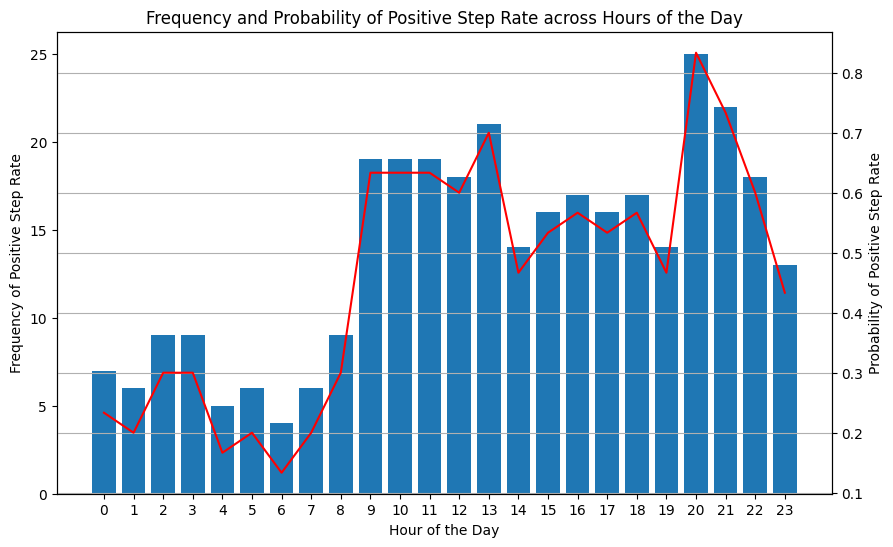

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def calculate_step_rate(input_directory, output_directory):
    for file_name in os.listdir(input_directory):
        if file_name.endswith(".xlsx") or file_name.endswith(".xls"):
            input_file = os.path.join(input_directory, file_name)
            output_file = os.path.join(output_directory, file_name)

            df = pd.read_excel(input_file, parse_dates=['datetime'])

            df['step_diff'] = df['RAW STEP COUNT'].diff()
            df['time_diff'] = df['datetime'].diff().dt.total_seconds()
            df['Step Rate (steps/s)'] = df['step_diff'] / df['time_diff']

            df.to_excel(output_file, index=False)

def apply_one_hot_encoding(input_directory, output_file):
    frequencies = {hour: [0] * 24 for hour in range(24)}
    total_lanterns = 0

    for file_name in os.listdir(input_directory):
        if file_name.endswith(".xlsx") or file_name.endswith(".xls"):
            input_file = os.path.join(input_directory, file_name)
            df = pd.read_excel(input_file, parse_dates=['datetime'])
            df['hour'] = df['datetime'].dt.hour

            condition = df['Step Rate (steps/s)'] > 0
            hours_checked = set()

            for index, row in df.iterrows():
                hour = row['hour']
                if hour not in hours_checked and condition[index]:
                    frequencies[hour][hour] += 1
                    hours_checked.add(hour)

            total_lanterns += 1

    print("Step 1: Calculated frequencies for each hour for all lanterns:")
    for hour, freq_list in frequencies.items():
        print(f"Hour {hour}: {sum(freq_list)}")

    probabilities_step = {hour: sum(frequencies[hour]) / total_lanterns for hour in range(24)}

    print("\nStep 2: Calculated probabilities for each hour:")
    for hour, prob in probabilities_step.items():
        print(f"Hour {hour}: {prob}")

    df_result = pd.DataFrame(frequencies)
    df_result.index.name = 'Lantern K'
    df_result.to_excel(output_file, index=False)

    return df_result, probabilities_step

def visualize_results(input_file, frequencies, probabilities_step):
    df = pd.read_excel(input_file)

    fig, ax1 = plt.subplots(figsize=(10, 6))

    for hour in df.columns:
        ax1.bar(int(hour), df[hour].sum(), color='#1f77b4')

    ax1.set_xlabel('Hour of the Day')
    ax1.set_ylabel('Frequency of Positive Step Rate')
    ax1.tick_params(axis='y')

    ax2 = ax1.twinx()
    ax2.plot(range(24), list(probabilities_step.values()), color='red', linestyle='-')
    ax2.set_ylabel('Probability of Positive Step Rate')
    ax2.tick_params(axis='y')

    plt.title('Frequency and Probability of Positive Step Rate across Hours of the Day')
    plt.xticks(range(24))
    plt.grid(True)
    plt.show()

# Input and output directories
input_directory = r'C:\Users\ahsani2\Documents\03- AI part\03 - Third Try\Dataset'
output_step_rate_directory = r'C:\Users\ahsani2\Documents\03- AI part\03 - Third Try\StepRate'
output_encoded_directory = r'C:\Users\ahsani2\Documents\03- AI part\03 - Third Try'
output_encoded_file = r'C:\Users\ahsani2\Documents\03- AI part\03 - Third Try\output_encoded_result_step.xlsx'

# Ensure the output directories exist
os.makedirs(output_step_rate_directory, exist_ok=True)

# Step 1: Calculate step rate for each file and save them separately
calculate_step_rate(input_directory, output_step_rate_directory)

# Step 2: Apply one-hot encoding to the step rate files and save the result
result_df, probabilities_step = apply_one_hot_encoding(output_step_rate_directory, os.path.join(output_encoded_directory, output_encoded_file))

# Step 3: Visualize the results
visualize_results(os.path.join(output_encoded_directory, output_encoded_file), result_df, probabilities_step)


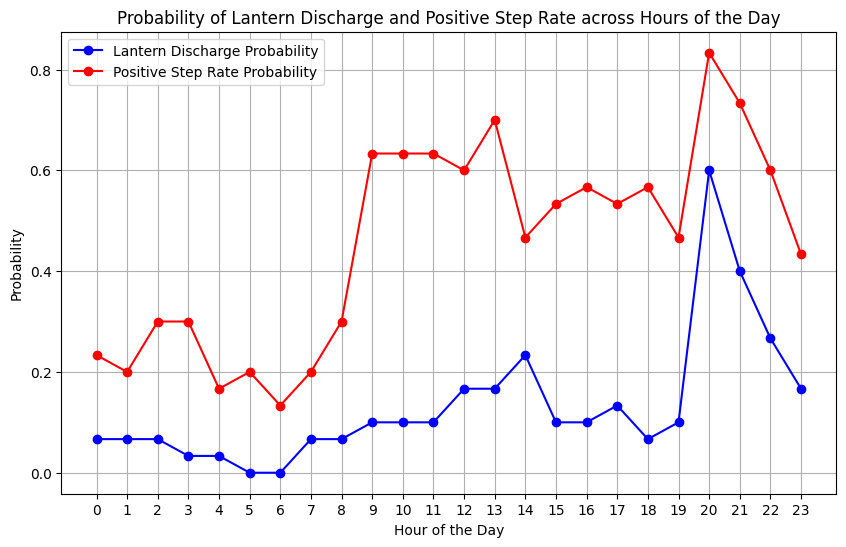

In [8]:
def visualize_prob(probabilities_vol, probabilities_step):
    plt.figure(figsize=(10, 6))
    plt.plot(range(24), list(probabilities_vol.values()), label='Lantern Discharge Probability', color='blue', marker='o', linestyle='-')
    plt.plot(range(24), list(probabilities_step.values()), label='Positive Step Rate Probability', color='red', marker='o', linestyle='-')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Probability')
    plt.title('Probability of Lantern Discharge and Positive Step Rate across Hours of the Day')
    plt.xticks(range(24))
    plt.legend()
    plt.grid(True)
    plt.show() 

visualize_prob(probabilities_vol, probabilities_step)